In [1]:
import matplotlib.pyplot as plt
from skimage.measure import regionprops
import numpy as np

# Generate preprocessed CellPose dataset

In [2]:
# convert RGB to gray (combine Red and Green channels), resize 256,256
# convert mask, resize 256,256

In [6]:
import os
import glob
import cv2

In [11]:
path = "/cluster/CMM/home/xfliu/workspace/JMIV_cell_counting/data/cellpose/CellPose_selected_05_06_2024_onlyRed"

In [12]:
save_path = "CellPose_converted_05_06_2024_onlyRed_max3channels_bugfixUint8_less200"
for mode_ in ["train", "test"]:
    if not os.path.exists(save_path + "/" + mode_):
        os.makedirs(save_path + "/" + mode_)

In [13]:
for mode in ["train", "test"]:
    images_masks_path_list = glob.glob(path + "/" + "{}/".format(mode) + "*_img.png")

    I_converted_max_list = []
    for impath in images_masks_path_list:
        imname = impath.split("/")[-1].split(".png")[0]
        maskname = imname.replace("img", "masks")
        I=plt.imread(impath)
        I_converted = np.max(I, axis = -1) #I[:,:,1]*Green_channel_coeff + I[:,:,0]*(1-Green_channel_coeff)
        I_converted_uint8 = np.array(I_converted*255., dtype=np.uint8)
        
        I_RGB = np.array(I*255., dtype=np.uint8)
        I_RGB = cv2.cvtColor(I_RGB, cv2.COLOR_BGR2RGB)
        #print("I_converted.max() = {}".format(I_converted.max()))
        #I_converted_max_list.append(I_converted.max())
        

        mask_path = impath.replace("img", "masks")

        M=plt.imread(mask_path)

        """
        Mtemp=(M/np.max(M))*255.
        Mtemp=Mtemp.astype(np.uint8)
        regions = regionprops(Mtemp)
        """

        Mtemp=(M/np.max(M))*2048.
        Mtemp=Mtemp.astype(np.uint32)
        regions = regionprops(Mtemp)

        if len(regions) <= 200:
            C=np.zeros((I.shape[0],I.shape[1]))
            for props in regions:
                y0, x0 = props.centroid
                C[int(y0),int(x0)]=255
            
            #cv2.imwrite(save_path + "/" + mode + '/{}_RGB.png'.format(imname), I_RGB)
            cv2.imwrite(save_path + "/" + mode + '/{}_converted.png'.format(imname), I_converted_uint8)
            cv2.imwrite(save_path + "/" + mode + '/{}_converted.png'.format(maskname), C)
        else:
            pass

        # resize image
        #resized = cv2.resize(I_converted, (256,256), interpolation = cv2.INTER_AREA)

In [15]:
I.max()

1.0

In [21]:
#plt.imshow(resized)

In [22]:
#I_converted.max()

In [23]:
import json

In [24]:
json_path = "/cluster/CMM/home/xfliu/workspace/JMIV_counting_cells/best_h_dataset255_CellPose_converted_05_06_2024_onlyRed_max3channels/best_h/best_h_opening_closing_test.json"
f = open(json_path) 
data = json.load(f) 
best_h_list_train = [int(i) for i in data.values()]

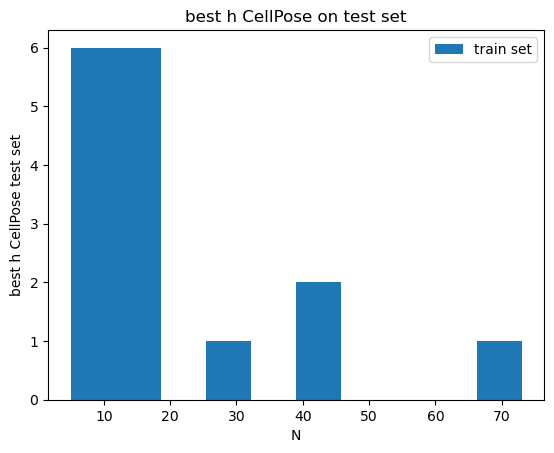

In [25]:
plt.hist(best_h_list_train, label="train set")
plt.title("best h CellPose on test set")
plt.ylabel("best h CellPose test set")
plt.xlabel("N")
plt.legend()